<a href="https://colab.research.google.com/github/shwetaNayak19/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


#**Importing required Libraries for analysis**.

In [ ]:
import pandas as pd # for data handling and manipulation
import numpy as np
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# magic function to render graphs/charts in notebook
%matplotlib inline  
import plotly.graph_objects as go
import plotly.express as px
#import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#set style for graph
#sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for labels,titles.
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
#plt.rcParams["axes.titlesize"] = 25
#plt.rcParams["axes.titleweight"] = 'bold'
#plt.rcParams['xtick.labelsize']=15
#plt.rcParams['ytick.labelsize']=15
#plt.rcParams["axes.labelsize"] = 20
#plt.rcParams["legend.fontsize"] = 15
#plt.rcParams["legend.title_fontsize"] = 15

#**Data Loading and Preperation**

#**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#**Reading Data in Notebook**

In [ ]:
#reading csv file 
Bank_market_df = pd.read_csv('/content/drive/MyDrive/BankMarket_prediction/bank-full.csv', delimiter=';')

#**Exploring Dataset**

In [ ]:
#checking top 5 rows of dataset
Bank_market_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Bank_market_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
Bank_market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
Bank_market_df.shape

(45211, 17)

#**Inference.**
* Total No of entries- 45211.
* Total of columns- 17.

In [ ]:
Bank_market_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
#check the column names 
Bank_market_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#**Data Description**

**Input variables:**
**Bank Client data:**

**age**: (numeric): age in years.

**job :** type of job (categorical): ['admin' , 'blue-collar' ,'entrepreneur' , 'housemaid' , 'management', 'retired' , 'self-employed' ,'services' , 'student' , 'technician' , 'unemployed' , 'unknown' ]

**marital :** marital status (categorical): 'divorced' , 'married' ,'single' , 'unknown' ; note: 'divorced' means divorced or widowed.

**education :**(categorical): ['tertiary' , 'secondary', 'primary' , 'unknown']

**default:** has credit in default? (categorical): 'no', 'yes', 'unknown'

**housing:** has housing loan? (categorical): 'no', 'yes', 'unknown'

**loan:** has personal loan? (categorical): 'no', 'yes', 'unknown')
Related with the last contact of the current campaign:

**contact:** contact communication type (categorical): 'cellular',   'telephone'.

**month:** last contact month of year (categorical): 'jan', 'feb', 'mar', ..., 'nov', 'dec'

**day_of_week:** last contact day of the week (categorical): 'mon','tue','wed', 'thu', 'fri'.

**duration:** last contact duration, in seconds (Numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

**campaign:**number of contacts performed during this campaign and for this client (numeric, includes last contact)

**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**previous:** number of contacts performed before this campaign and for this client (numeric)

**poutcome:** outcome of the previous marketing campaign (categorical):  'failure', 'nonexistent', 'success')

**Output variable** (desired target):

**y** - has the client subscribed a term deposit? (binary:  'yes' , 'no')

In [ ]:
Bank_market_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#**References**

* As, we can see that all columns are in proper format in our dataset. so we dont need to do Formating.


#**Handling missing values**

In [ ]:
#check missing values.
Bank_market_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#**Inferences**
* There is no null values in the given dataset.

In [ ]:
#check for duplicate rows
Bank_market_df.duplicated().value_counts()

False    45211
dtype: int64

* As we can see there are no duplicate row in our dataset.

In [ ]:
Bank_market_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
#creating copy of dataset before working with it so that we can have original data untouched
df = Bank_market_df.copy()

#**Check columns and their Unique Values**

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [ ]:
for column in df.columns:
  print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#**EDA(Exploratory Data Analysis)**

#**Explore categorical features**

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))  

the feature is job and number of categories are 12
the feature is marital and number of categories are 3
the feature is education and number of categories are 4
the feature is default and number of categories are 2
the feature is housing and number of categories are 2
the feature is loan and number of categories are 2
the feature is contact and number of categories are 3
the feature is month and number of categories are 12
the feature is poutcome and number of categories are 4


#**Inference**
* There are 9 Categorical features.
* Job and Month has more categorical values.

In [ ]:
df[categorical_features].head(9)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
5,management,married,tertiary,no,yes,no,unknown,may,unknown
6,management,single,tertiary,no,yes,yes,unknown,may,unknown
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown
8,retired,married,primary,no,yes,no,unknown,may,unknown


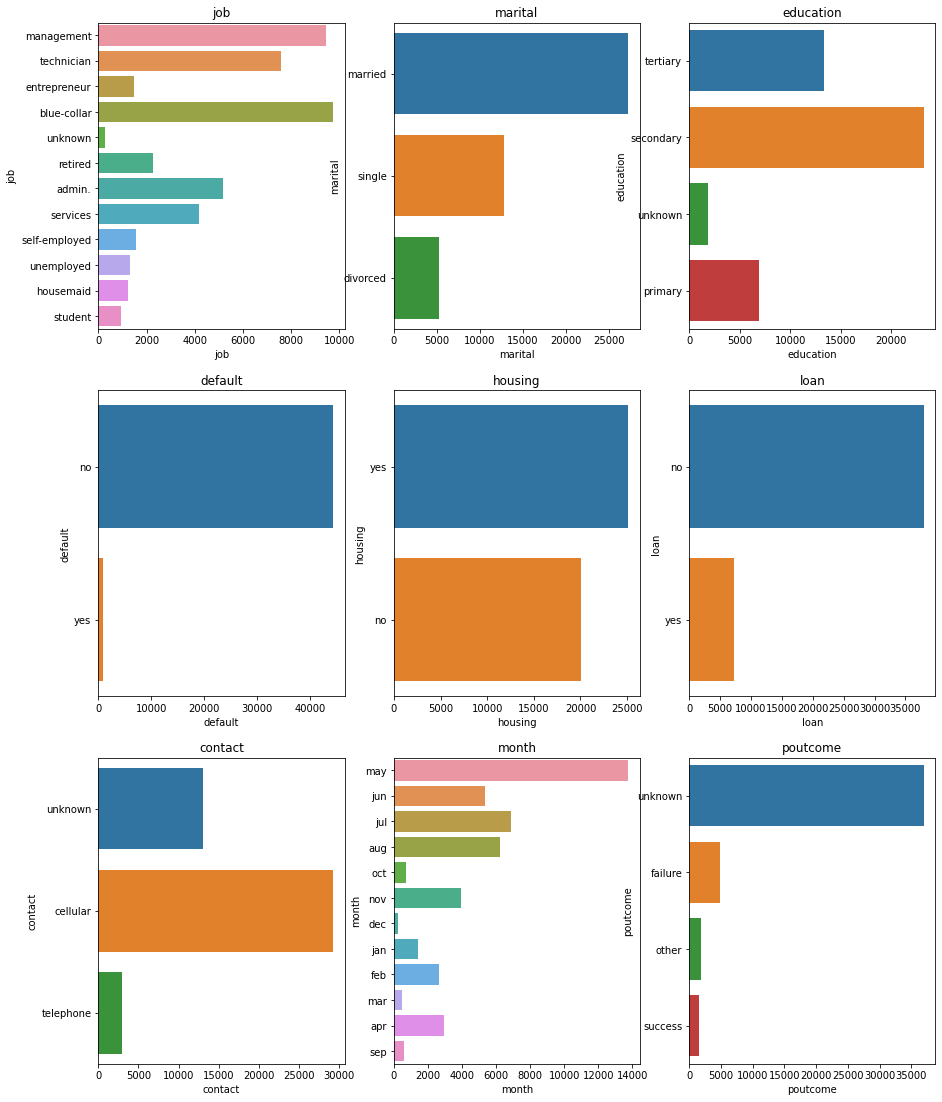

In [ ]:
#check count on categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+= 1
plt.show()  

#**Inference**
* **Management and blue collor** has the highest distribution and **Housemaid and students** has the lowest.
* We have maximum data of **married people**.
* **Secondary** and **tertiory** education background clients are highest in the dataset.

* Client who has no credit in default is maximum and who has is very low  near to 1 %.

* Client with **No personal loan** are more in dataset.
* Previous outcome is unknown in maximum cases might be the because there was no proper reason given for the same.
* We have maximum data available for the month of **May, june, july** and **august** and very less in Dec.

* **Y** which is our **target variable** : we can see there are more no results than yes.

*  As it is **classification problem** and we have class imbalance which is the problem we have to solve this class imbalance before training model.

#**Relationship between categorical feature and Target Variable**

In [ ]:
#now let's check relation between cat feature and outcome variable but first we have to drop our outcome variable from categorical columns
#cat_features= categorical_features.drop('y',axis=1)

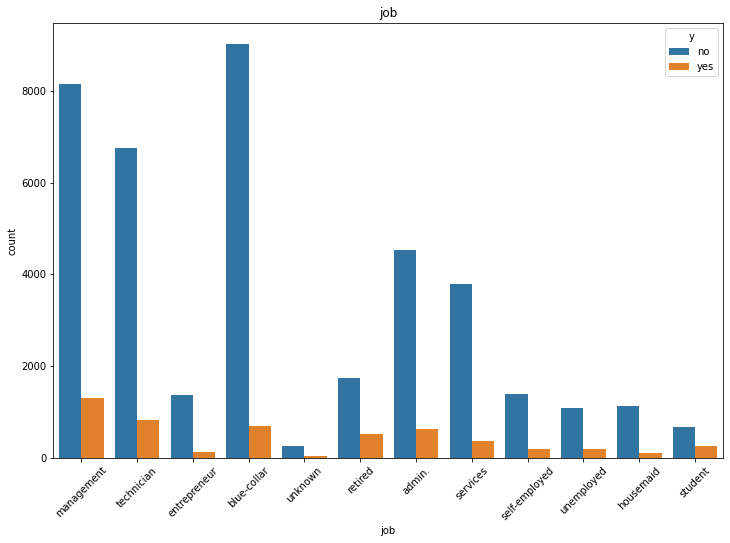

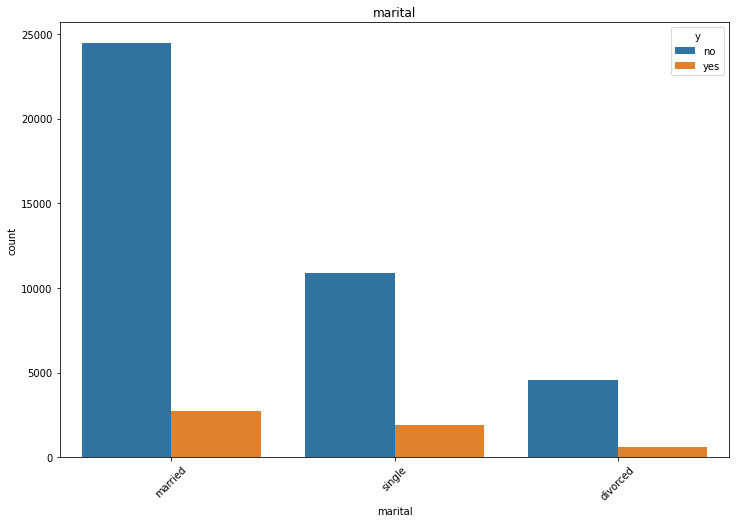

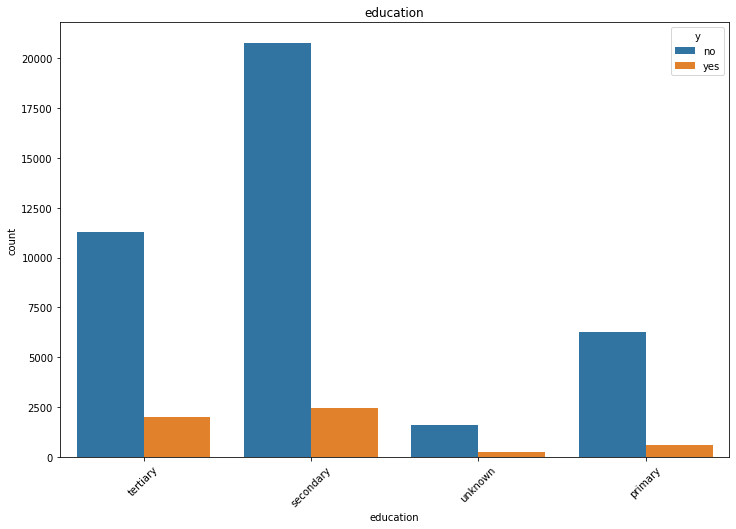

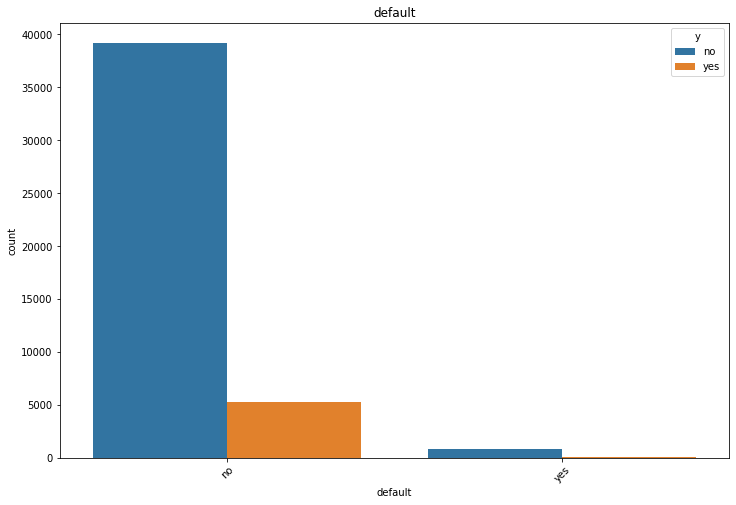

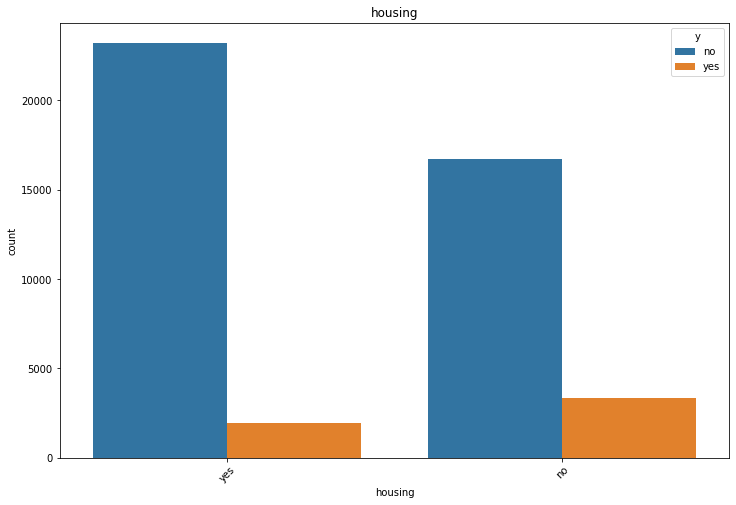

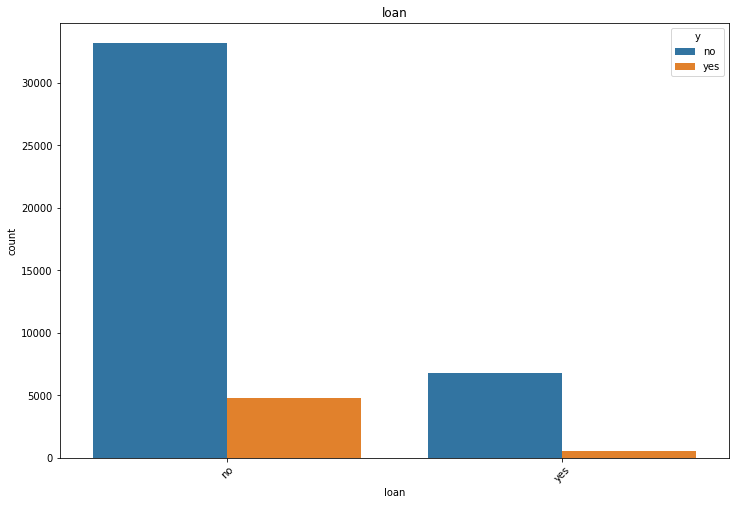

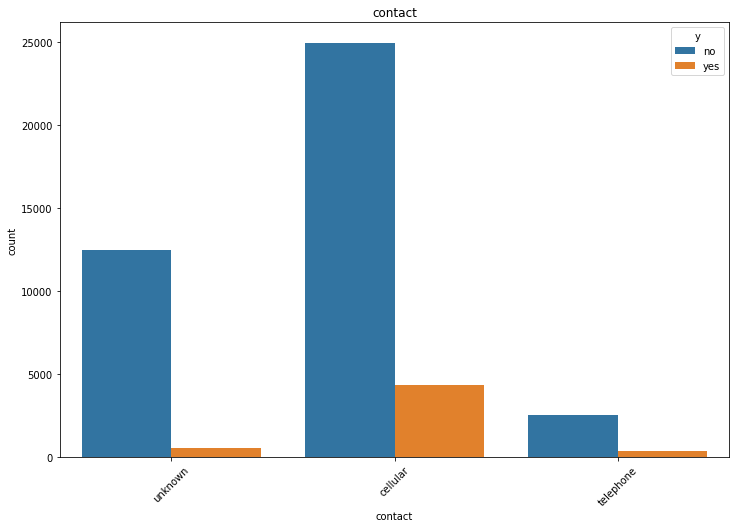

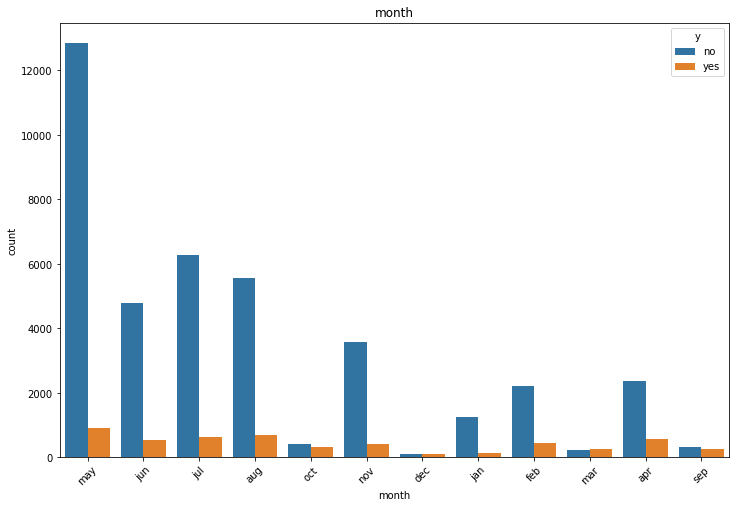

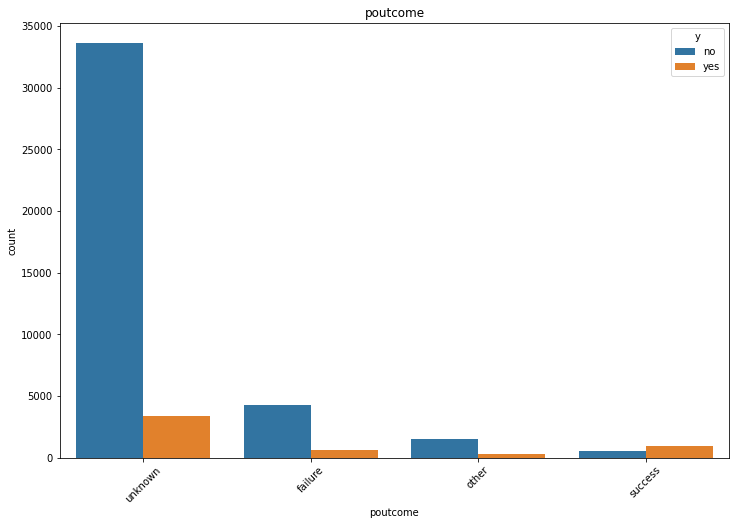

In [ ]:
for cat in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='y',data=df)
  plt.xlabel(cat)
  plt.xticks(rotation=45)
  plt.title(cat)

#**References**

* clients who has housing loan seems to be not interested much on deposit.
* if pre campagin outcome(i-e poutcome)=success then, there is high chance of client to show interest on term deposit.


#**Explore Numerical Features**

In [ ]:
#list of Numerical Variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O' ) & (feature not in ['y']))]
print('Number of Numerical variables:', len(numerical_features))

#Visualise the numerical variables
df[numerical_features].head()

Number of Numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#**Reference**

* There are 7 Numerical Features.

In [ ]:
#find discrete numerical feature
dis_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("discrete variable count: {} ".format(len(dis_feature)))


discrete variable count: 0 



* There is no discrete variable in given dataset.

In [ ]:
#find contineous numerical feature
con_feature= [feature for feature in numerical_features if feature not in dis_feature+['y'] ]
print('contineous variable count:{}'.format(len(con_feature)))

contineous variable count:7



* There are 7 contineous variable in given dataset.

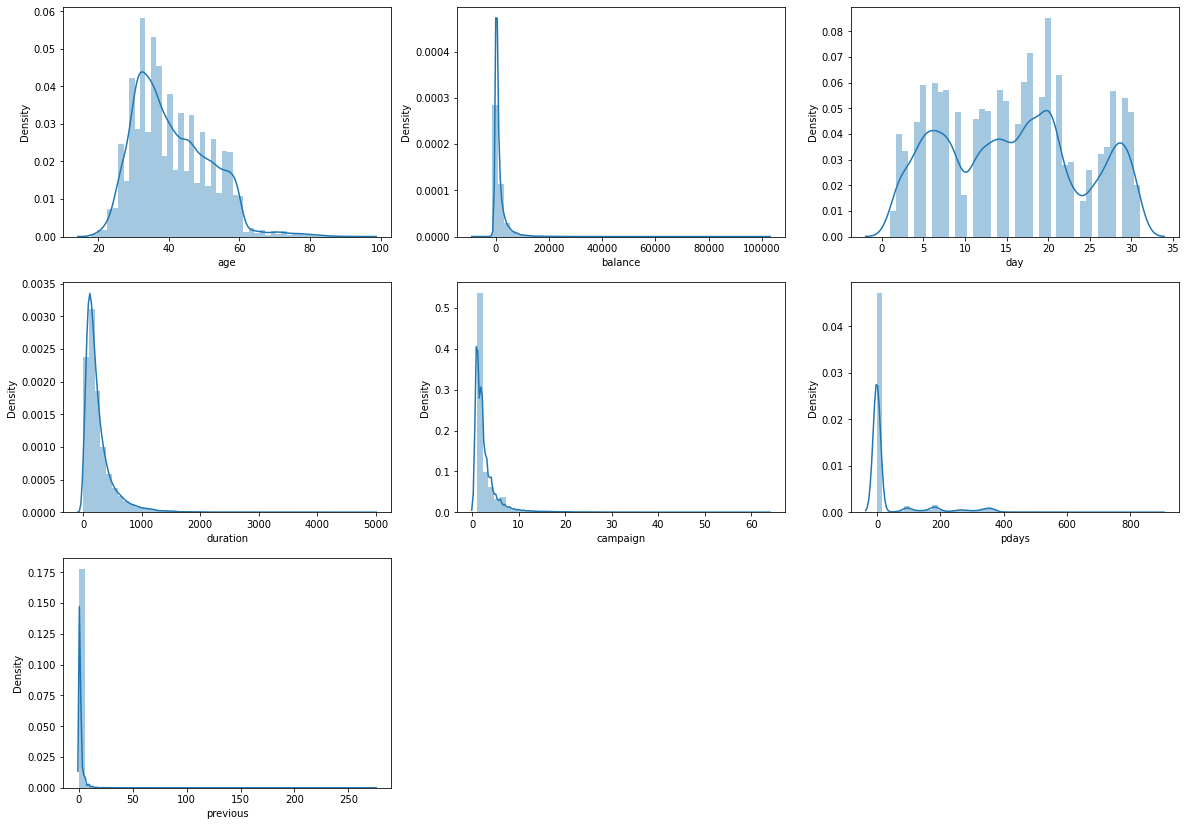

In [ ]:
#plot a univariate distribution of observations
plt.figure(figsize=(20,60),facecolor='white')
plotnumber =1
for contineous_features in con_feature :
  ax = plt.subplot(12,3,plotnumber)
  sns.distplot(df[contineous_features])
  plt.xlabel(contineous_features)
  plotnumber+= 1
plt.show()  

#**Reference**
* It seems **age** and **days** are Normally distributed.
* **Balance, Duration, Campaign, pdays** and **previous** are skewed towards right and seems to have some outliers.

#**Relation between Numerical feature  and Target Variable**

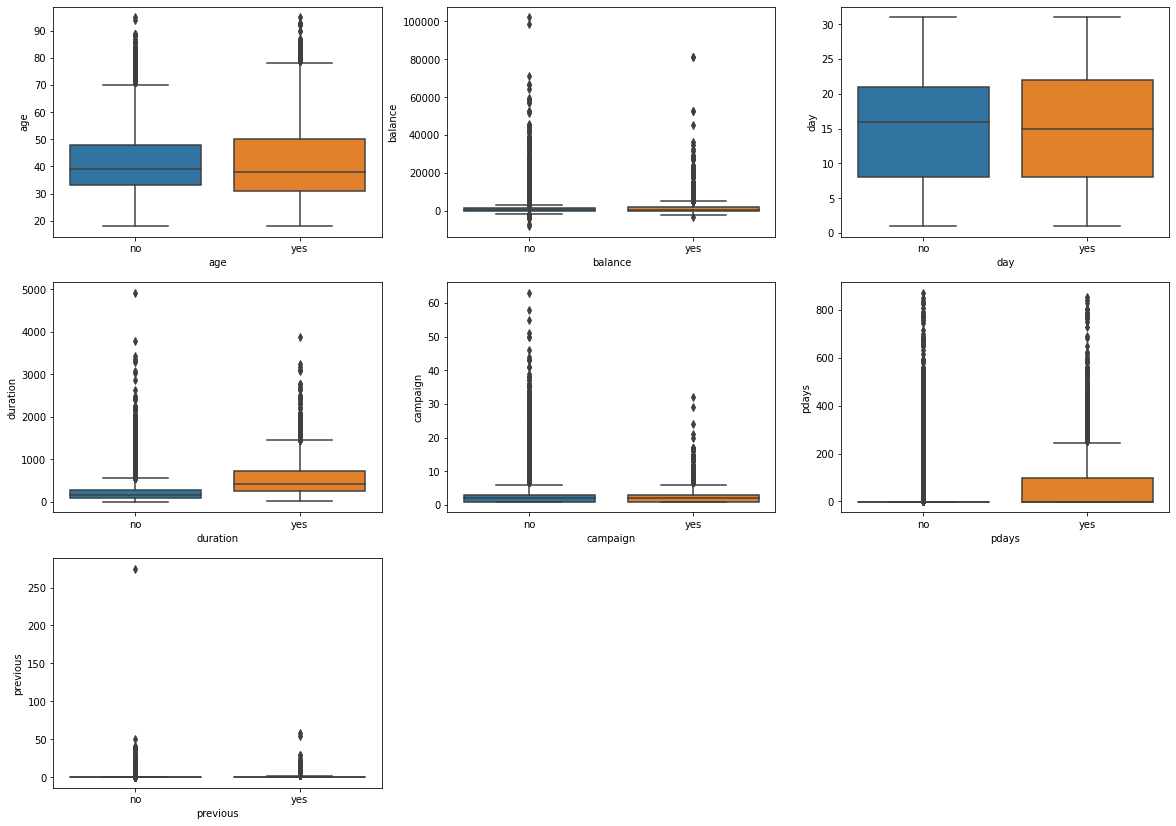

In [ ]:
#Box plot to show target distribution with respect to numerical features.
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in con_feature:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(x="y", y= df[feature], data=df)
  plt.xlabel(feature)
  plotnumber+= 1
plt.show()  

#**Reference**
* client shows interest on response(term deposit) who had discussion for longer duration.

#**Find Outliers in Numerical features**

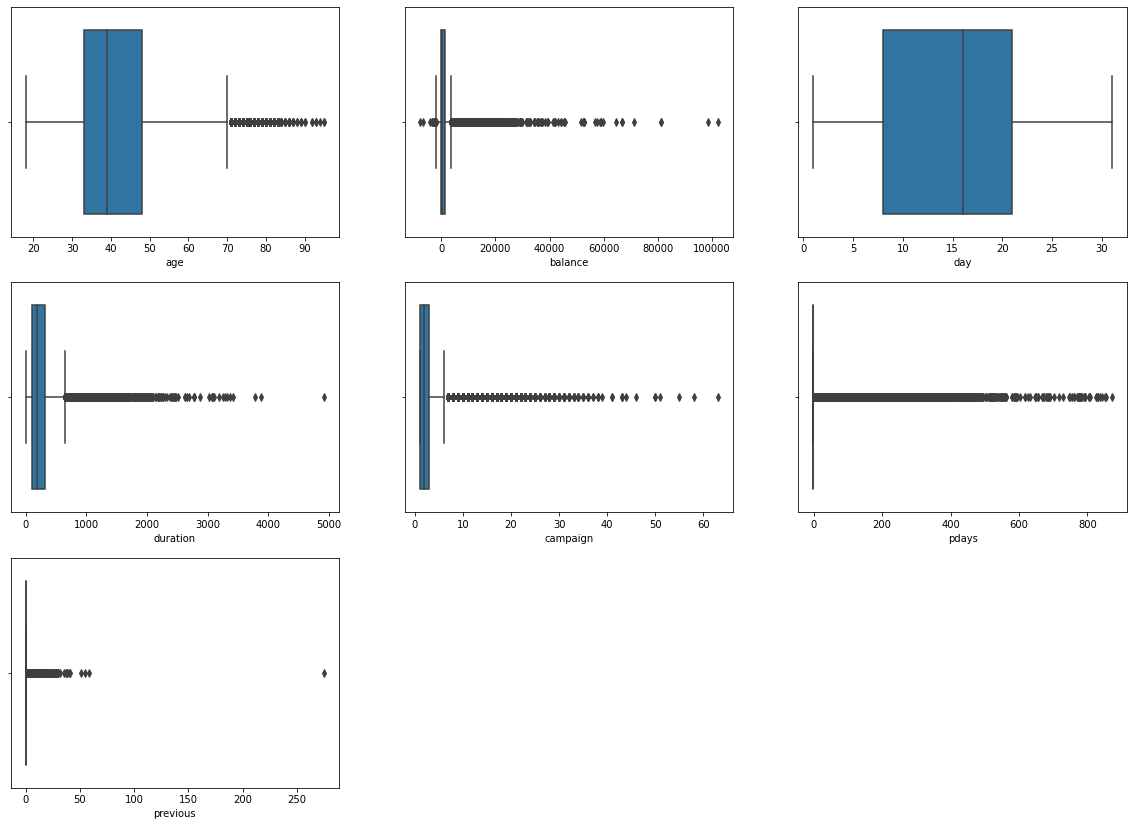

In [ ]:
#Boxplot on Numerical features to find outliers
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(df[numerical_feature])
  plt.xlabel(numerical_feature)
  plotnumber+= 1
plt.show() 

#**Reference**

* We have some outliers in numerical features **age, balance, duration, campaign, pdays and previous** have some outliers.

#**Explore correlation**


#**Correlation heatmap of selected numerical features/predictor variables.**

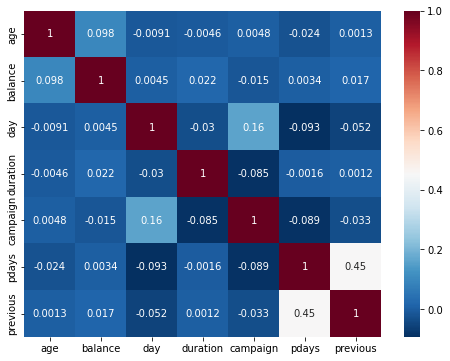

In [ ]:
#checking for correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')

#**Reference**

* we can see that there is no such corelation.

#**Check the datast is balanced or not based on target values**

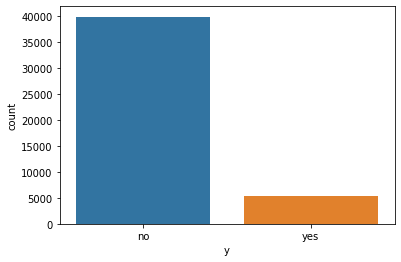

In [ ]:
sns.countplot(x='y', data= df)
plt.show()

#**Reference**

* Our dataset has highly Imbalanced, as our target variable i-e **y** has more number of No compare to Yes.

#**Feature Engineering**


In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(45211, 17)

In [ ]:
df1[df1['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df1[df1['poutcome']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df1[df1['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


#**Reference**

* As seen above pdays -1 means these peoples are new or involving 1st time in campaign.
* They have no previous contact so previous ==0 and poutcomes is unknown for all -1 values of pdays
* we will drop pdays column

In [ ]:
#dropping pdays column
df1.drop('pdays',inplace=True,axis=1)

In [ ]:
#let's check campaign feature values
df1['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [ ]:
#let's check previous features values
df1['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [ ]:
df1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
#let's create 3 categories for day feature like 1-10 is 1 and 11-20 is 2 etc
day_conv_dic = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:2,13:2,14:2,15:2,16:2,17:2,18:2,19:2,20:2,21:3,22:3,23:3,24:3,25:3,26:3,27:3,28:3,29:3,30:3,31:3}
df1['day'].replace(day_conv_dic,inplace=True)

In [ ]:
df1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,may,198,1,0,unknown,no


#**Encoding Categorical Features**

* We have four feature who have binary value including target variable.
* We will do binary label encoding to them.

In [ ]:
#create dictionary for binary encoding
bin_dic = {'yes':1,'no':0}

#create list of features
list1 = ['default','housing','loan','y']

#label encoding
for i in list1:
  df1[i]=df1[i].map(bin_dic)

#**inference**

* We will perform one hot encoding on **job, marital, education, contact, day,month, poutcome** features

In [ ]:
#one hot encoding
df1 = pd.get_dummies(df1,columns=['job','marital','education','contact','day','month','poutcome'])

In [ ]:
df1.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#**Training Model**

In [ ]:
#importing all the required ML packages
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler #for feature scaling

#**Let's train model before solving class imbalance problem and check it's performance.**

In [ ]:
#removing target variable from data frame to seperate feature and target
features = df1.drop('y',axis=1)

In [ ]:
features.shape

(45211, 49)

In [ ]:
#target variable
target = df1['y']

In [ ]:
target.shape

(45211,)

In [ ]:
#splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(features,target , test_size = 0.2, random_state = 0) 

In [ ]:
#checking shape of train and test data
print(X_train.shape)
print(X_test.shape)

(36168, 49)
(9043, 49)


#**Let's train Logistic regression**

In [ ]:
#training logistic regression model
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

Train Score :0.8964277814642778
Test score :0.8901913081941834

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7980
           1       0.58      0.24      0.34      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043




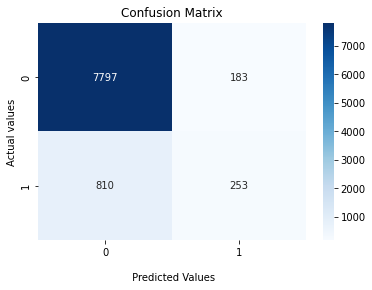

In [ ]:
#check model performance and metrics
print(f'Train Score :{LR.score(X_train,y_train)}')
print(f'Test score :{accuracy_score(y_test,y_pred)}')
#to print one blank line
print()
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)
print()

#plotting confussion matrix
ax=sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
ax.set_xlabel('\n Predicted Values')
ax.set_ylabel('Actual values')
ax.set_title('Confusion Matrix')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

#**Reference**

* From above confusion matrix we can see that for category 0 it predicted **7797** correctly and **183** time incorrectly.

* for category 1 it predicted **253** times correct and **810** incorrect this is because model has less data to learn for class 1 because of an class imbalance.

* Now we will solve class imbalance before training any other model.

#**Synthetic Minority Oversampling Technique (SMOTE)**

This technique generates synthetic data for the minority class.

* SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

#SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor Repeat the steps until data is balanced.

In [ ]:
#check class distribution 
df1['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64